In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.isidewith.com/polls/popular'
response = requests.get(url)

issues_votes = []

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    polls = soup.find_all('div', class_='poll')
    
    for poll in polls:
        # Correctly identifying the issue name
        img_div = poll.find('div', class_='img')
        if img_div:
            p_tag = img_div.find('p')
            if p_tag:
                span_tag = p_tag.find('span')
                if span_tag:
                    issue_name = span_tag.text.strip()

                    # Adjusting logic for finding vote count
                    count_div = poll.find('div', class_='count')
                    if count_div:
                        vote_text = count_div.text.strip().split()[0].replace(',', '')
                        vote_count = int(vote_text) if vote_text.isdigit() else 0
                        
                        # Appending issue name and vote count to the list
                        issues_votes.append((issue_name, vote_count))

    # Sorting and extracting the top 100 issues based on vote count
    issues_votes.sort(key=lambda x: x[1], reverse=True)
    top_issues = issues_votes[:100]

    iteration = 1
    for issue, votes in top_issues:
        print(f"Issue {iteration}: {issue}, Votes: {votes}")
        iteration = iteration + 1
else:
    print(f"Failed to fetch webpage: Status code {response.status_code}")



Issue 1: Abortion, Votes: 36422084
Issue 2: Gun Control, Votes: 36407755
Issue 3: Immigration Healthcare, Votes: 35084464
Issue 4: Obamacare, Votes: 35048729
Issue 5: Gay Marriage, Votes: 34695076
Issue 6: Marijuana, Votes: 33666341
Issue 7: Minimum Wage, Votes: 27225743
Issue 8: Terrorism, Votes: 26670374
Issue 9: Common Core, Votes: 25008260
Issue 10: Climate Change, Votes: 24713635
Issue 11: Student Loans, Votes: 24572468
Issue 12: Oil Drilling, Votes: 21665712
Issue 13: Voter Fraud, Votes: 19320820
Issue 14: Immigration, Votes: 17960950
Issue 15: Death Penalty, Votes: 16815198
Issue 16: Planned Parenthood Funding, Votes: 16755158
Issue 17: Drug Policy, Votes: 16653057
Issue 18: Border Security, Votes: 16107125
Issue 19: Affirmative Action, Votes: 15442805
Issue 20: Immigrant Laborers, Votes: 15275785
Issue 21: Fracking, Votes: 14694673
Issue 22: Equal Pay, Votes: 14456923
Issue 23: Government Mandates, Votes: 14446116
Issue 24: In-State Tuition, Votes: 14066110
Issue 25: Government

In [5]:
# Extract just the issue names from each tuple
issues = [issue[0] for issue in top_issues]

# Print out the list to verify
for issue in issues:
    print(issue)
print(issues)

Abortion
Gun Control
Immigration Healthcare
Obamacare
Gay Marriage
Marijuana
Minimum Wage
Terrorism
Common Core
Climate Change
Student Loans
Oil Drilling
Voter Fraud
Immigration
Death Penalty
Planned Parenthood Funding
Drug Policy
Border Security
Affirmative Action
Immigrant Laborers
Fracking
Equal Pay
Government Mandates
In-State Tuition
Government Spending
United Nations
Term Limits
Patriot Act
Solitary Confinement for Juveniles
Space Exploration
Medicaid
Religious Freedom Act
Criminal Voting Rights
Farm Subsidies
Alternative Energy
Israel
Mandatory Vaccinations
GMO Labels
Drones
Euthanasia
First Amendment
Immigrant Assimilation
No-Fly List Gun Control
Nuclear Energy
Police Body Cameras
Net Neutrality
Illegal Immigrant Detainment
Pension Reform
Gerrymandering
NSA Surveillance
Labor Unions
Property Taxes
Confederate Flag
Welfare Drug Testing
Border Wall
Drug Price Regulation
Military Spending
Foreign Assassination
Right of Foreigners to Vote
NSA Domestic Surveillance
Mandatory Militar

In [ ]:
'''from ntscraper import Nitter
import pandas as pd

# Initialize the Nitter scraper
scraper = Nitter(log_level=1)
'''



In [ ]:
'''from ntscraper import Nitter
import pandas as pd
import time

results = []

def scrape_data_for_term(issue):
    try:
        tweets = scraper.get_tweets(issue, mode='term', number=5, language='en')
        if isinstance(tweets, list):
            for tweet in tweets:
                if isinstance(tweet, dict):
                    results.append({
                        'issue': issue,
                        'tweet': tweet.get('content', ''),
                        'likes': tweet.get('likeCount', 0),
                        'retweets': tweet.get('retweetCount', 0),
                        # Add other fields as needed
                    })
        else:
            print(f"No valid tweets returned for {issue}")
    except Exception as e:
        print(f"Error while fetching data for {issue}: {str(e)}")
        time.sleep(60)  # Sleep to avoid hitting rate limit quickly

for issue in issues:
    scrape_data_for_term(issue)

df = pd.DataFrame(results)
df.to_csv('scraped_tweets.csv', index=False)
print("Data scraping complete. Results saved to 'scraped_tweets.csv'.")
'''

In [ ]:
'''import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("E25G8XB4oorLGCTdo3U8ZsXfn", "0jBPTkYVU6zsMvcUAf1RqVFxbvI6OeiXuVFzhUpMpCIRvHOzKX")
auth.set_access_token("1328482358044012544-2q2pCvQR9GiZv80nqEHKGuCvVSDdRB", "8VoFpz5A2f824soL0adWjSxfml4220weD4GPPgqIBSeRh")

api = tweepy.API(auth)

# Collect tweets
for issue in issues:
    tweets = api.search_tweets(q=issue, count=1)  # Adjust count as needed
    for tweet in tweets:
        # Here you can collect the data you need
        print(tweet.text, tweet.favorite_count, tweet.retweet_count, tweet.reply_count, tweet.author.followers_count)

'''

Epoch 1, Train Loss: 138.58869341949918, Test Loss: 138.29431960161995
Epoch 2, Train Loss: 135.5686924493135, Test Loss: 135.32184107163374
Epoch 3, Train Loss: 133.04294779763293, Test Loss: 132.29265459846047
Epoch 4, Train Loss: 129.40194474405317, Test Loss: 128.81483818502988
Epoch 5, Train Loss: 125.82952482308914, Test Loss: 124.36804513370289
Epoch 6, Train Loss: 120.72169665436246, Test Loss: 118.58651778277229
Epoch 7, Train Loss: 114.38629400908057, Test Loss: 111.22129417868221
Epoch 8, Train Loss: 106.33026942922108, Test Loss: 101.84689375933479
Epoch 9, Train Loss: 95.4579955143715, Test Loss: 89.99910825841567
Epoch 10, Train Loss: 82.98755577429017, Test Loss: 75.58285746854894
Epoch 11, Train Loss: 68.65305242965471, Test Loss: 59.705808976117304
Epoch 12, Train Loss: 54.47828543364112, Test Loss: 44.377061507281134
Epoch 13, Train Loss: 41.62836783679563, Test Loss: 31.899758170632754
Epoch 14, Train Loss: 32.144960801992845, Test Loss: 22.514924498165357
Epoch 15, 

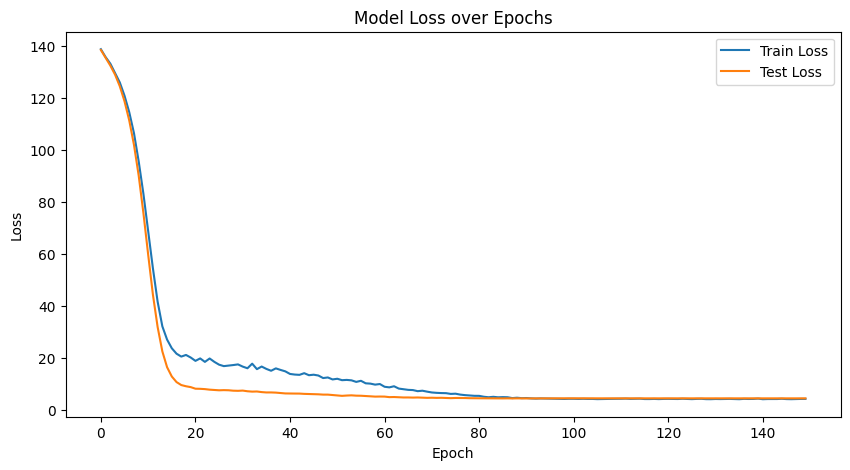

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("TweetsDataIssues.csv")
df['followersCount'] = np.log1p(df['followersCount'])  # Log transform to normalize follower counts

# Selecting features and target
features = df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount']].values
followers = df['followersCount'].values.reshape(-1, 1)

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, followers, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_features = torch.tensor(X_train, dtype=torch.float32)
test_features = torch.tensor(X_test, dtype=torch.float32)
train_followers = torch.tensor(y_train, dtype=torch.float32)
test_followers = torch.tensor(y_test, dtype=torch.float32)
train_dataset = TensorDataset(train_features, train_followers)
test_dataset = TensorDataset(test_features, test_followers)

# Define the model
class FollowerPredictorMLP(nn.Module):
    def __init__(self):
        super(FollowerPredictorMLP, self).__init__()
        self.layer1 = nn.Linear(4, 8)  # Adjust input features count
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(8, 8)
        self.output = nn.Linear(8, 1)  # Predicting one output: log(followersCount)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = FollowerPredictorMLP()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
loss_fn = nn.MSELoss()  # Suitable for regression
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# Training function
def train_model(model, train_dataset, test_dataset, epochs=150):
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    train_losses, test_losses = [], []
    for epoch in range(epochs):
        total_train_loss = 0
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        scheduler.step()  # Adjust the learning rate
        total_train_loss /= len(train_loader)
        train_losses.append(total_train_loss)

        total_test_loss = 0
        model.eval()
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                total_test_loss += loss.item()
        total_test_loss /= len(test_loader)
        test_losses.append(total_test_loss)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_train_loss}, Test Loss: {total_test_loss}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, train_dataset, test_dataset)

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()

# Continue with training function and plotting as defined


In [63]:
# Define the neural network
class FollowerPredictorMLP(nn.Module):
    def __init__(self):
        super(FollowerPredictorMLP, self).__init__()
        self.layer1 = nn.Linear(4, 10)  # 4 features to 10 hidden nodes
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(10, 8)
        self.output = nn.Linear(8, 1)  # Output is log(followersCount)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Assuming model is trained and setup as shown in your previous code
model = FollowerPredictorMLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# Assuming the model has been trained, let's extract the weights
model.eval()
first_layer_weights = model.layer1.weight.data.numpy()

# The shape of first_layer_weights is [10, 4] (10 nodes in the first hidden layer, 4 input features)
# We need to aggregate these weights to get a single weight per input feature
# One simple way to do this is to take the mean of the weights across all nodes in the first hidden layer
importance_weights = np.mean(first_layer_weights, axis=0)

# Now you can use these weights to calculate the User Influence Score
df['UserInfluenceScore'] = np.dot(df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount']], importance_weights)

# Print the importance weights for inspection
print("Importance Weights for each feature:", importance_weights)


Importance Weights for each feature: [ 0.04797497  0.01278863 -0.06039076  0.0333367 ]


Epoch 1, Train Loss: 99.88325045002041, Test Loss: 96.29323398365693
Epoch 2, Train Loss: 87.14984051149283, Test Loss: 77.22978165570427
Epoch 3, Train Loss: 62.68295071729973, Test Loss: 45.9352845584645
Epoch 4, Train Loss: 35.24885670106802, Test Loss: 19.65199021732106
Epoch 5, Train Loss: 20.63726679958514, Test Loss: 11.341727116528679
Epoch 6, Train Loss: 20.240506029840727, Test Loss: 9.638735182145062
Epoch 7, Train Loss: 16.348869651111205, Test Loss: 8.805065954432768
Epoch 8, Train Loss: 14.749781167329248, Test Loss: 7.952503176296458
Epoch 9, Train Loss: 13.22165244372923, Test Loss: 7.422165772494147
Epoch 10, Train Loss: 12.705553496061865, Test Loss: 6.886254212435554
Epoch 11, Train Loss: 13.182929651061102, Test Loss: 6.5854128949782424
Epoch 12, Train Loss: 11.626485461619362, Test Loss: 5.82086108712589
Epoch 13, Train Loss: 11.38046940760826, Test Loss: 5.4556489551768585
Epoch 14, Train Loss: 10.15967344170186, Test Loss: 5.167272553724401
Epoch 15, Train Loss: 

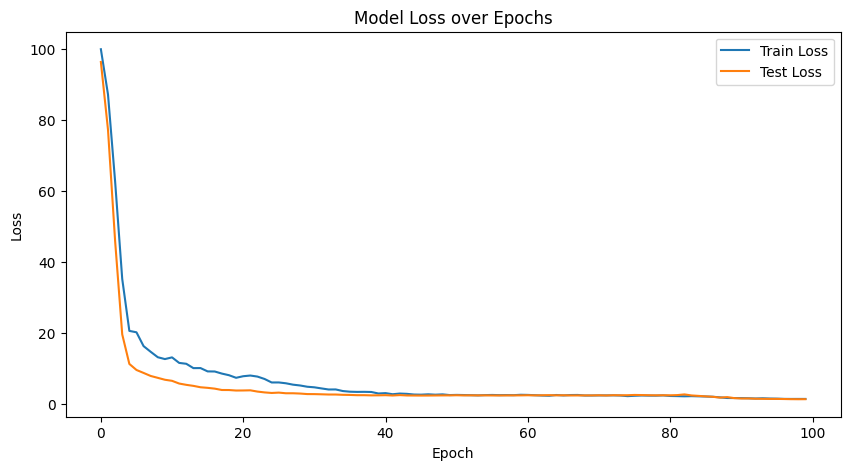

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("TweetsDataIssues.csv")

df['viewCount'] = np.log1p(df['viewCount'])

features = df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount', 'followersCount']].values
views = df['viewCount'].values.reshape(-1, 1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, views, test_size=0.2, random_state=42)

train_features = torch.tensor(X_train, dtype=torch.float32)
test_features = torch.tensor(X_test, dtype=torch.float32)
train_views = torch.tensor(y_train, dtype=torch.float32)
test_views = torch.tensor(y_test, dtype=torch.float32)
train_dataset = TensorDataset(train_features, train_views)
test_dataset = TensorDataset(test_features, test_views)



# Define the model
class EngagementMLP(nn.Module):
    def __init__(self):
        super(EngagementMLP, self).__init__()
        self.layer1 = nn.Linear(5, 10)  # Input dimension adjusted for 5 features
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(10, 8)  # Correct input dimension from previous layer
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = EngagementMLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)  # Learning rate scheduler

# Training function
def train_model(model, train_dataset, test_dataset, epochs=100):
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    train_losses, test_losses = [], []
    for epoch in range(epochs):
        total_train_loss = 0
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        scheduler.step()  # Adjust the learning rate
        total_train_loss /= len(train_loader)
        train_losses.append(total_train_loss)

        total_test_loss = 0
        model.eval()
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                total_test_loss += loss.item()
        total_test_loss /= len(test_loader)
        test_losses.append(total_test_loss)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_train_loss}, Test Loss: {total_test_loss}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, train_dataset, test_dataset)

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()



In [68]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Extract coefficients
feature_weights = reg.coef_

# Normalize weights to use in the engagement score
normalized_weights = feature_weights / np.sum(np.abs(feature_weights))

print("Normalized Weights for Features: ", normalized_weights)


Normalized Weights for Features:  [[0.14495304 0.22313488 0.07701185 0.36365618 0.19124404]]


searchTerm
Affirmative Action     23782.196145
Border Security       174180.663775
Climate Change        113652.081391
Covid Vaccines         76332.853619
Criminal Voting        42023.076492
Name: EngagementScore, dtype: float64


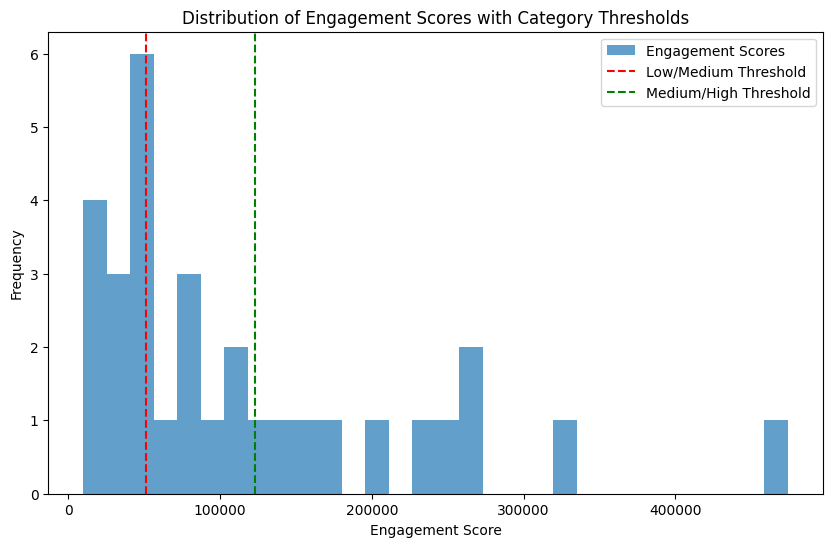

Engagement Scores by Topic:
searchTerm
Affirmative Action        23782.196145
Border Security          174180.663775
Climate Change           113652.081391
Covid Vaccines            76332.853619
Criminal Voting           42023.076492
Death Penalty            125746.789231
Equal Pay                272627.516037
Euthanasia                62259.849200
Farm Subsidies             9986.791471
First Amendment          142420.434526
Fracking                  17560.622962
Gay Marriage              22133.411959
Government Mandates       27977.434532
Israel                   201353.047015
Marijuana                 72689.725056
Medicaid                 269320.474066
Minimum Wage              72314.538342
Nuclear Energy           248723.771017
Oil Drilling              53418.763644
Patriot Act               28404.863990
Religious Freedom Act    234416.971092
Student Loans            109205.031793
Term Limits               56051.408859
Terrorism                 94566.282381
United Nations           

In [32]:
import matplotlib.pyplot as plt


# Assuming 'df' is your DataFrame and 'normalized_weights' contains the weights for each feature
# Calculate the engagement score for each tweet
features = ['likeCount', 'replyCount', 'quoteCount', 'retweetCount', 'followersCount']
df['EngagementScore'] = df[features].dot(normalized_weights.T)

# Aggregate scores by political topic
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Determine thresholds for "low", "medium", and "high" engagement
low_threshold, high_threshold = topic_engagement.quantile([0.33, 0.66])

# Assign categories based on these thresholds
def categorize_engagement(score):
    if score <= low_threshold:
        return 'Low'
    elif score <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Assuming 'topic_engagement' is a DataFrame and you have a column 'EngagementScore' for plotting
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Check the structure of topic_engagement
print(topic_engagement.head())

# Assuming topic_engagement is a Series with numeric values now, plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(topic_engagement.values, bins=30, alpha=0.7, label='Engagement Scores')
plt.axvline(x=topic_engagement.quantile(0.33), color='r', linestyle='--', label='Low/Medium Threshold')
plt.axvline(x=topic_engagement.quantile(0.66), color='g', linestyle='--', label='Medium/High Threshold')
plt.title('Distribution of Engagement Scores with Category Thresholds')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Calculate the average engagement score for each searchTerm
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Print the engagement score for each searchTerm
print("Engagement Scores by Topic:")
print(topic_engagement)